<a href="https://colab.research.google.com/github/AjayKumarGogineni777/Search-Snippets-/blob/master/Search_Snippets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.vision.gan import *

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
os.listdir('/content/gdrive/My Drive/DCNN/')

['Dynamic-CNN',
 'Term_doc_matrix',
 'models',
 'data_lm.pkl',
 'data_lm_complete.pkl',
 'corpus_df.csv',
 'complete.xlsx',
 'abstracts_LM.ipynb']

In [0]:
file = "/content/gdrive/My Drive/DCNN/Term_doc_matrix/train.txt"
corpus = open(file,encoding='utf8')
corpus = corpus.readlines()
#docs = corpus.split("\n") 

In [0]:
corpus[0]

'manufacture manufacturer directory directory china taiwan products manufacturers directory- taiwan china products manufacturer direcory exporter directory supplier directory suppliers business\n'

In [0]:
!pip install nltk

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
import nltk
from fastai.text import *
from nltk import tokenize
#a1 = tokenize.sent_tokenize(corpus[0])

In [0]:
len(a1[0].split(' ')[-1])

8

In [0]:
a2 = tokenize.sent_tokenize(corpus[10])

In [0]:
a1[0][0:-9]

'manufacture manufacturer directory directory china taiwan products manufacturers directory- taiwan china products manufacturer direcory exporter directory supplier directory suppliers'

In [0]:
last = '\n'
a1[0][0:-9]+last

'manufacture manufacturer directory directory china taiwan products manufacturers directory- taiwan china products manufacturer direcory exporter directory supplier directory suppliers\n'

In [0]:
len(corpus)

10060

In [0]:
labels = []
text = []
last = '\n'
for i in range(len(corpus)):
  a1 = tokenize.sent_tokenize(corpus[i])
  #print(i)
  temp_label = a1[0].split(' ')[-1]
  
  length = len(a1[0].split(' ')[-1])
  temp_text = a1[0][0:-1*(length+1)]+last
  labels.append(temp_label)
  text.append(temp_text)
  

In [0]:
labels

In [0]:
len(text)

10060

In [0]:
### Creating a dataframe with labels and text as separate columns
import pandas as pd
df = pd.DataFrame(list(zip(labels, text)), 
               columns =['labels', 'text']) 
df[-10:-1]

labels                                               text
10050  sports  sports espn espn wire sportid espn gymnastics ...
10051  sports  shanfan gym gymnastics unlimited welcome gymna...
10052  sports  about fullsearch terms gymnastics iam url gymn...
10053  sports  olympic sports programme index sportcode inter...
10054  sports  thesundevils cstv sports gym asu gym body wome...
10055  sports  gtcgymnastics gymnastic training center inform...
10056  sports  unhwildcats index university hampshire gymnast...
10057  sports  tarheelblue cstv sports gym unc gym body unive...
10058  sports  auburntigers cstv sports gym aub gym body aubu...

In [0]:
### Functions used within fastai to perform tokenisation and numericlization
re1 = re.compile(r'  +')
def fixup(x):
  x = x.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace('nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace('<br />', "\n").replace('\\"', '"').replace('<unk>','u_n').replace(' @.@ ','.').replace(' @-@ ','-').replace('\\', ' \\ ')
  return re1.sub(' ', html.unescape(x))
def get_texts(df, n_lbls=1):
    labels = df.iloc[:,range(n_lbls)].values.astype(np.int64)
    texts = f'\n{BOS} {FLD} 1 ' + df[n_lbls].astype(str)
    for i in range(n_lbls+1, len(df.columns)): 
        texts += f' {FLD} {i-n_lbls} ' + df[i].astype(str)
    texts = texts.apply(fixup).values.astype(str)
    tok = Tokenizer().proc_all_mp(partition_by_cores(texts))
    return tok, list(labels)
def get_all(df, n_lbls):
    tok, labels = [], []
    for i, r in enumerate(df):
        print(i)
        tok_, labels_ = get_texts(r, n_lbls)
        tok += tok_;
        labels += labels_
    return tok, labels

In [0]:
tok_trn, trn_labels = get_all(data_lm, 7)

In [0]:
### Saving the dataframe as a csv file to load it later

df.to_csv('/content/gdrive/My Drive/DCNN/corpus_df.csv') 

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/DCNN/corpus_df.csv')
df.head()

Unnamed: 0    labels                                               text
0           0  business  manufacture manufacturer directory directory c...
1           1  business  empmag electronics manufacturing procurement h...
2           2  business  dfma truecost paper true cost overseas manufac...
3           3  business  thomasnet thomasnet cnc machining metal stampi...
4           4  business  crnano products nanotechnology products molecu...

In [0]:
df[0:5]['labels']

0    business
1    business
2    business
3    business
4    business
Name: labels, dtype: object

In [0]:
len(df)

10060

In [0]:
df.insert(1, "Labels", "0") 

In [0]:
df.head()

Abstract Labels
0  Balancing complexity and simplicity has played...      0
1  For decades now, silicon has been the workhors...      0
2  Ultrathin molybdenum disulphide (MoS2) has eme...      0
3  Layer-by-layer stacking or lateral interfacing...      0
4  Many energy- and information-storage processes...      0

In [0]:
trn_idx = range(0, int(0.8*len(df)), 1)
val_idx = range(int(0.8*len(df)), len(df), 1)

In [0]:
val_idx

range(244, 306)

In [0]:
df[0: int(0.8*len(df))]

In [0]:
## Splitting the dataset into train and valid dataframes to send it to a language model learner

trn_texts = df[0: int(0.8*len(df))]['text']
val_texts = df[int(0.8*len(df)) : len(df)]['text']
trn_labels = df[0: int(0.8*len(df))]['labels']
val_labels = df[int(0.8*len(df)) : len(df)]['labels']

In [0]:
col_names = ['text','labels']

In [0]:
df_trn = pd.DataFrame({'text':trn_texts, 'labels':trn_labels}, columns=col_names)
df_val = pd.DataFrame({'text':val_texts, 'labels':val_labels}, columns=col_names)

In [0]:
# Language model data
data_lm = TextLMDataBunch.from_df('./', train_df=df_trn, valid_df=df_val)

In [0]:
path22 = '/content/gdrive/My Drive/DCNN/'

In [0]:
# Create databunch
data = (TextList.from_df(df, cols='text')
                .split_by_rand_pct(0.2)
                .label_for_lm()  
                .databunch(bs=48))
data.show_batch()

In [0]:
# save and load
#data_lm.save('/content/gdrive/My Drive/DCNN/models/tmp_lm')
#data_lm = TextClasDataBunch.load('/content/gdrive/My Drive/DCNN/models/tmp_lm/')
bs = 64
data_lm.save('/content/gdrive/My Drive/DCNN/data_lm.pkl')
path2 = '/content/gdrive/My Drive/DCNN/'
data_lm = load_data(path2, 'data_lm_complete.pkl', bs=bs)

In [0]:
### Pre trained Wiki Text103
# Language model
#learner = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.5)

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


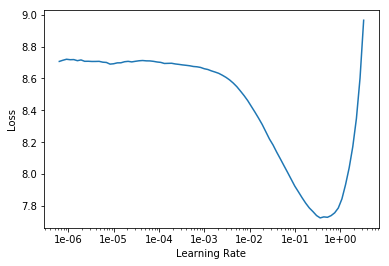

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

In [0]:
learn.save_encoder('/content/gdrive/My Drive/DCNN/models/initial_enc-2-epochs-complete')

In [0]:
learn.save('/content/gdrive/My Drive/DCNN/models/fit_head')

In [0]:
learn.load('/content/gdrive/My Drive/DCNN/models/fit_head')

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

In [0]:
###### Main encoder
learn.save_encoder('/content/gdrive/My Drive/DCNN/models/initial_enc-4-epochs-1e-3-complete-2')

In [0]:
#learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

In [0]:
learn.save('/content/gdrive/My Drive/DCNN/models/fine_tuned-ver-2')

In [0]:
learn.load('/content/gdrive/My Drive/DCNN/models/fine_tuned-ver-2')

In [0]:
#TEXT = "I liked this movie because"
TEXT = 'crnano products nanotechnology products molecu'
N_WORDS = 40
N_SENTENCES = 2

In [0]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

crnano products nanotechnology products molecu nanotechnology technology nanotechnology online nanotechnology news information nanotechnology news information nanotechnology project nanotechnology articles nanotechnology 
  xxbos couples couples couples couples clinics jobs search jobs links search sites search jobs listed daily 
  xxbos wikipedia wiki modern japanese culture modern
crnano products nanotechnology products molecu network security disease control demographic information security analysis production security principles administrative 
  xxbos cdc gov cdc index cdc diets diet covers consumer health information healthy food eating healthy health decisions 
  xxbos msdn microsoft microsoft digital device manager microsoft


In [0]:
learn.save_encoder('/content/gdrive/My Drive/DCNN/models/fine_tuned_enc')

In [0]:
label_cols = ['business', 'computers', 'culture-arts-entertainment', 'education-science', 'engineering', 'health','politics-society', 'sports']

In [0]:
### Loading the language model weights
data_lm = load_data(path2, 'data_lm_complete.pkl', bs=bs)

In [0]:

###########  Main code for classifier data

bs = 32
csv_path = '/content/gdrive/My Drive/DCNN/'
classifier_data = (TextList.from_df(df, csv_path, cols=['text','labels'], vocab=data_lm.vocab)
                    .split_by_rand_pct(0.3)
                    .label_from_df(cols='labels', label_delim='|')
                    .databunch(bs=bs))

In [0]:
learner = text_classifier_learner(classifier_data, AWD_LSTM, drop_mult=0.6, metrics=[fbeta])

In [0]:
learner.load_encoder('/content/gdrive/My Drive/DCNN/models/initial_enc-4-epochs-1e-3')
learner.freeze()

In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


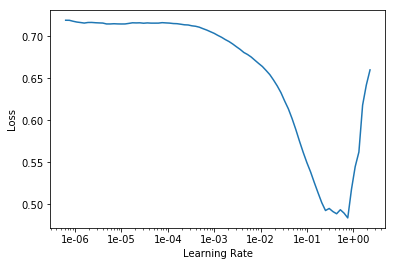

In [0]:
learner.recorder.plot()

In [0]:
lr = 3e-2
learner.fit_one_cycle(1,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )

In [0]:
learner.freeze_to(-2)
learner.fit_one_cycle(1,slice(lr/(2.6**4),lr), moms=(0.8,0.7) )

In [0]:
#learner.freeze_to(-2)
lr2 = 1e-1
learner.fit_one_cycle(5,slice(lr2/(2.6**4),lr2), moms=(0.8,0.7))

In [0]:
article = classifier_data.valid_ds[1]

In [0]:
article

(Text xxbos hsph harvard edu xxunk teaching lectures teaching tips lecture courses teaching lecture course core course epidemiology 
   education - science, MultiCategory education-science)

In [0]:
pred = learner.predict(article); pred

(MultiCategory education-science,
 tensor([0., 0., 0., 1., 0., 0., 0., 0.]),
 tensor([3.3864e-04, 2.9056e-04, 1.0389e-04, 9.9932e-01, 8.7070e-05, 6.4646e-05,
         1.8953e-05, 9.2937e-05]))

In [0]:
for i in range(9):
  article = classifier_data.valid_ds[i]
  print(article)
  pred = learner.predict(article)
  print(pred)

(Text xxbos money excite excite excite money investing stock quotes finance research stay investments instant stock market data forecasts news quotes research help informed decisions stock 
  business, MultiCategory business)
(MultiCategory business, tensor([1., 0., 0., 0., 0., 0., 0., 0.]), tensor([0.9278, 0.0186, 0.0032, 0.0165, 0.0383, 0.0027, 0.0077, 0.0013]))
(Text xxbos hsph harvard edu xxunk teaching lectures teaching tips lecture courses teaching lecture course core course epidemiology 
  education - science, MultiCategory education-science)
(MultiCategory education-science, tensor([0., 0., 0., 1., 0., 0., 0., 0.]), tensor([3.3864e-04, 2.9056e-04, 1.0389e-04, 9.9932e-01, 8.7070e-05, 6.4646e-05,
        1.8953e-05, 9.2937e-05]))
(Text xxbos redhotjazz xxunk origins band music origins band music bob history jazz songs era audio format 
  culture - arts - entertainment, MultiCategory culture-arts-entertainment)
(MultiCategory culture-arts-entertainment, tensor([0., 0., 1., 0., 0.,

In [0]:
## Classification data
data_clas = TextList.from_df('./', train_df=df_trn, valid_df=df_val)
#data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             ##grab all the text files in path
             #.split_by_folder(valid='test')
             ##split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             #.label_from_folder(classes=['neg', 'pos'])
             ##label them all with their folders
             #.databunch(bs=bs))

#data_clas.save('data_clas.pkl')

In [0]:
data_lm.show_batch()

In [0]:
data_lm.vocab.itos[:20]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '\n ',
 '-',
 'research',
 'edu',
 'information',
 'com',
 'wikipedia',
 'news',
 'science',
 'business',
 'computer']

In [0]:
os.listdir('/content/gdrive/My Drive/DCNN/models/')

['tmp_lm']

In [0]:
wgts = torch.load('/content/gdrive/My Drive/DCNN/models/initial_enc-4-epochs-1e-3-complete-2.pth', map_location=lambda storage, 
                  loc: storage)

In [0]:
wgts

In [0]:
### To get the embeddings after training the language model

enc_wgts = to_np(wgts['encoder.weight'])
row_m = enc_wgts.mean(0)

In [0]:
vs=len(data_lm.vocab.itos)
vs

12296

In [0]:
em_sz,nh,nl = 400,1150,3

In [0]:
new_w = np.zeros((vs, em_sz), dtype=np.float32)
for i,w in enumerate(data_lm.vocab.itos):
  r = data_lm.vocab.stoi[w]
  new_w[i] = enc_wgts[r] if r>=0 else row_m

In [0]:
new_w.shape

(12296, 400)

In [0]:
a = np.array(new_w)
a.tofile('/content/gdrive/My Drive/DCNN/models/embedding_complete_2.dat')

In [0]:
c = np.fromfile('/content/gdrive/My Drive/DCNN/models/embedding_complete_2.dat')

In [0]:
c

array([ 5.526257e-11,  1.149266e-08,  3.358729e-09, -1.756039e-17, ...,  9.128388e-11,  2.195480e-11, -4.498006e-16,
        1.050028e-12])

In [0]:
import numpy as np
np.save('/content/gdrive/My Drive/DCNN/models/embedding_mat_train_complete_2', new_w)

In [0]:
a1 = np.load('/content/gdrive/My Drive/DCNN/models/embedding_mat_train_complete_2.npy')

In [0]:
a1

array([[-0.085058,  0.100772, -0.017439,  0.195977, ...,  0.145913, -0.06421 ,  0.578189,  0.13284 ],
       [-0.033232, -0.053075,  0.093153, -0.119751, ..., -0.016156,  0.004146,  0.157359,  0.02942 ],
       [ 0.46815 , -0.699107,  0.247056, -0.07405 , ...,  0.178934, -0.159647, -0.42875 , -0.189792],
       [-0.033232, -0.053075,  0.093153, -0.119751, ..., -0.016157,  0.004146,  0.157359,  0.02942 ],
       ...,
       [-0.136092, -0.145486,  0.197327, -0.189973, ..., -0.07694 , -0.023463,  0.244955,  0.059197],
       [-0.136092, -0.145486,  0.197327, -0.189973, ..., -0.07694 , -0.023463,  0.244955,  0.059197],
       [-0.136092, -0.145486,  0.197327, -0.189973, ..., -0.07694 , -0.023463,  0.244955,  0.059197],
       [-0.136092, -0.145486,  0.197327, -0.189973, ..., -0.07694 , -0.023463,  0.244955,  0.059197]], dtype=float32)

In [0]:
new_w

array([[-0.090462,  0.104983, -0.014477,  0.194724, ...,  0.143208, -0.06088 ,  0.583759,  0.132869],
       [-0.027256, -0.052673,  0.087577, -0.1102  , ..., -0.005977, -0.00073 ,  0.151314,  0.034199],
       [ 0.470589, -0.698789,  0.250647, -0.071392, ...,  0.181065, -0.162577, -0.428003, -0.191562],
       [-0.027256, -0.052673,  0.087577, -0.1102  , ..., -0.005977, -0.00073 ,  0.151314,  0.034199],
       ...,
       [-0.123323, -0.151918,  0.183395, -0.173582, ..., -0.061473, -0.034964,  0.232951,  0.071032],
       [-0.123323, -0.151918,  0.183395, -0.173582, ..., -0.061473, -0.034964,  0.232951,  0.071032],
       [-0.123323, -0.151918,  0.183395, -0.173582, ..., -0.061473, -0.034964,  0.232951,  0.071032],
       [-0.123323, -0.151918,  0.183395, -0.173582, ..., -0.061473, -0.034964,  0.232951,  0.071032]], dtype=float32)

In [0]:
###3 embedding for complete data

In [0]:
0.2*10060

2012.0

In [0]:
trn_texts = df[0: len(df)]['text']
val_texts = df[0:2000]['text']
trn_labels = df[0: len(df)]['labels']
val_labels = df[0:2000]['labels']

In [0]:
col_names = ['labels','text']

In [0]:
df_trn = pd.DataFrame({'text':trn_texts, 'labels':trn_labels}, columns=col_names)
df_val = pd.DataFrame({'text':val_texts, 'labels':val_labels}, columns=col_names)

In [0]:
# Language model data
data_lm = TextLMDataBunch.from_df('./', train_df=df_trn, valid_df=df_val)

In [0]:
data_lm.vocab.itos

In [0]:
df[0:1]['labels']

0    business
Name: labels, dtype: object

In [0]:
from sklearn.feature_extraction.text import CountVectorizer 
veczr = CountVectorizer(tokenizer=tokenize)

In [0]:
trn_term_doc = veczr.fit_transform(corpus[0])

In [0]:
df[:]['text'][1]

'empmag electronics manufacturing procurement homepage electronics manufacturing procurement magazine procrement power products production essentials data management\n'

In [0]:
data = [line.strip() for line in open(file, 'r')]
texts = [[word.lower() for word in text.split()] for text in data]

In [0]:
data[0]

'manufacture manufacturer directory directory china taiwan products manufacturers directory- taiwan china products manufacturer direcory exporter directory supplier directory suppliers business'

In [0]:
trn_term_doc = veczr.fit_transform(data[0:10])

In [0]:
t1 = corpus[0:10]
trn_term_doc = veczr.fit_transform(t1)

In [0]:
[corpus[0:10]]

[['manufacture manufacturer directory directory china taiwan products manufacturers directory- taiwan china products manufacturer direcory exporter directory supplier directory suppliers business\n',
  'empmag electronics manufacturing procurement homepage electronics manufacturing procurement magazine procrement power products production essentials data management business\n',
  'dfma truecost paper true cost overseas manufacture product design costs manufacturing products china manufacturing redesigned product china save business\n',
  'thomasnet thomasnet cnc machining metal stamping gaskets fasteners searchable database information products services cad drawings business\n',
  'crnano products nanotechnology products molecular manufacturing product structural design simplest products software-controlled extra cost manufacturing business\n',
  'epa gov wastewise wrr buyman buy manufacture recycled wastewise epa organizations manufactured products recycled content percentage recycled

In [0]:
a1[0].split(' ')[0:-1]

['americangymnasticsclub',
 'american',
 'gymnastic',
 'club',
 'recreational',
 'gymnastics',
 'boys',
 'girls',
 'schedule',
 'fees',
 'programs',
 'calendar',
 'birthday',
 'parties',
 'camps',
 'staff']

In [0]:
a2 = tokenize.sent_tokenize(corpus[0])
np.unique(a2[0].split(' ')[0:-1])

array(['china', 'direcory', 'directory', 'directory-', 'exporter', 'manufacture', 'manufacturer', 'manufacturers',
       'products', 'supplier', 'suppliers', 'taiwan'], dtype='<U13')

In [0]:
k2 = np.unique(a2[0].split(' ')[0:-1])
len(k2)

12

In [0]:
corpus[0]

'manufacture manufacturer directory directory china taiwan products manufacturers directory- taiwan china products manufacturer direcory exporter directory supplier directory suppliers business\n'

In [0]:
#unique = []
unique = np.unique(a2[0].split(' ')[0:-1])
unique = np.ndarray.tolist(unique)
for i in range(len(corpus)):
  a1 = tokenize.sent_tokenize(corpus[i])
  #print(i)
  temp_label = a1[0].split(' ')[-1]
  
  length = len(a1[0].split(' ')[-1])
  temp_text = a1[0][0:-1*(length+1)]
  k1 = np.unique(a1[0].split(' ')[0:-1])
  print(k1)
  print(unique)
  
  k1 = np.array(k1)
  for j in range(len(k1)):
    if (k1[j] not in unique):
      print(k1[j])
      
      unique.append(k1[j])


In [0]:
all_labels = df[0:10060]['labels']

In [0]:
np.unique(all_labels)

array(['business', 'computers', 'culture-arts-entertainment', 'education-science', 'engineering', 'health',
       'politics-society', 'sports'], dtype=object)

In [0]:
len(unique)

26265

In [0]:
corpus[0][0]

'm'

In [0]:
### Term Document Matrix
mat = np.zeros((len(corpus),len(unique)))
for i in range(len(corpus)):
  for j in range(len(unique)):
    a1 = tokenize.sent_tokenize(corpus[i])
    #print(i)
    temp_label = a1[0].split(' ')[-1]
  
    length = len(a1[0].split(' ')[-1])
    temp_text = a1[0][0:-1*(length+1)].split(' ')
    length2 = len(temp_text)
    for k in range(length2):
      if temp_text[k] == unique[j]:
        mat[i][j] = 1
    

In [0]:
np.save('content/gdrive/My Drive/DCNN/Term_doc_matrix/geekfile', mat) 

In [0]:
temp_text = a1[0][0:-1*(length+1)].split(' ')
temp_text

['americangymnasticsclub',
 'american',
 'gymnastic',
 'club',
 'recreational',
 'gymnastics',
 'boys',
 'girls',
 'schedule',
 'fees',
 'programs',
 'calendar',
 'birthday',
 'parties',
 'camps',
 'staff']

In [0]:
b1 = np.ndarray.tolist(unique)
b1.append(k1[0])

In [0]:
b1

['china',
 'direcory',
 'directory',
 'directory-',
 'exporter',
 'manufacture',
 'manufacturer',
 'manufacturers',
 'products',
 'supplier',
 'suppliers',
 'taiwan',
 'data']

In [0]:
aa = china not in k2
#print(1)

In [0]:
aa

False

In [0]:
if (china not in k2):
  print(2)
else:
  print(3)

3


In [0]:
k2[0]

'china'

In [0]:
########################
#############
#GAN

In [0]:
import os
path = '/content/gdrive/My Drive/Satellite/GAN/'
path_hr = path+'images_all/'
path_lr = path+'clouds_all/'
print(len(os.listdir(path_hr)))
print(len(os.listdir(path_lr)))

4161
4161


In [0]:
#from crappify import *
il = ImageList.from_folder(path_hr)
#parallel(crappifier(path_lr, path_hr), il.items)

In [0]:
bs,size=32, 128
# bs,size = 24,160
#bs,size = 8,256
arch = models.resnet34

In [0]:
src = ImageImageList.from_folder(path_lr).split_by_rand_pct(0.1, seed=42)

In [0]:

#func = lambda x: path_hr+'/'+str(x.name)
def get_data(bs,size):
    data = (src.label_from_func(lambda x: path_hr+x.name)
           .transform(get_transforms(max_zoom=2.), size=size, tfm_y=True)
           .databunch(bs=bs).normalize(imagenet_stats, do_y=True))

    data.c = 3
    return data
data_gen = get_data(bs,size)  

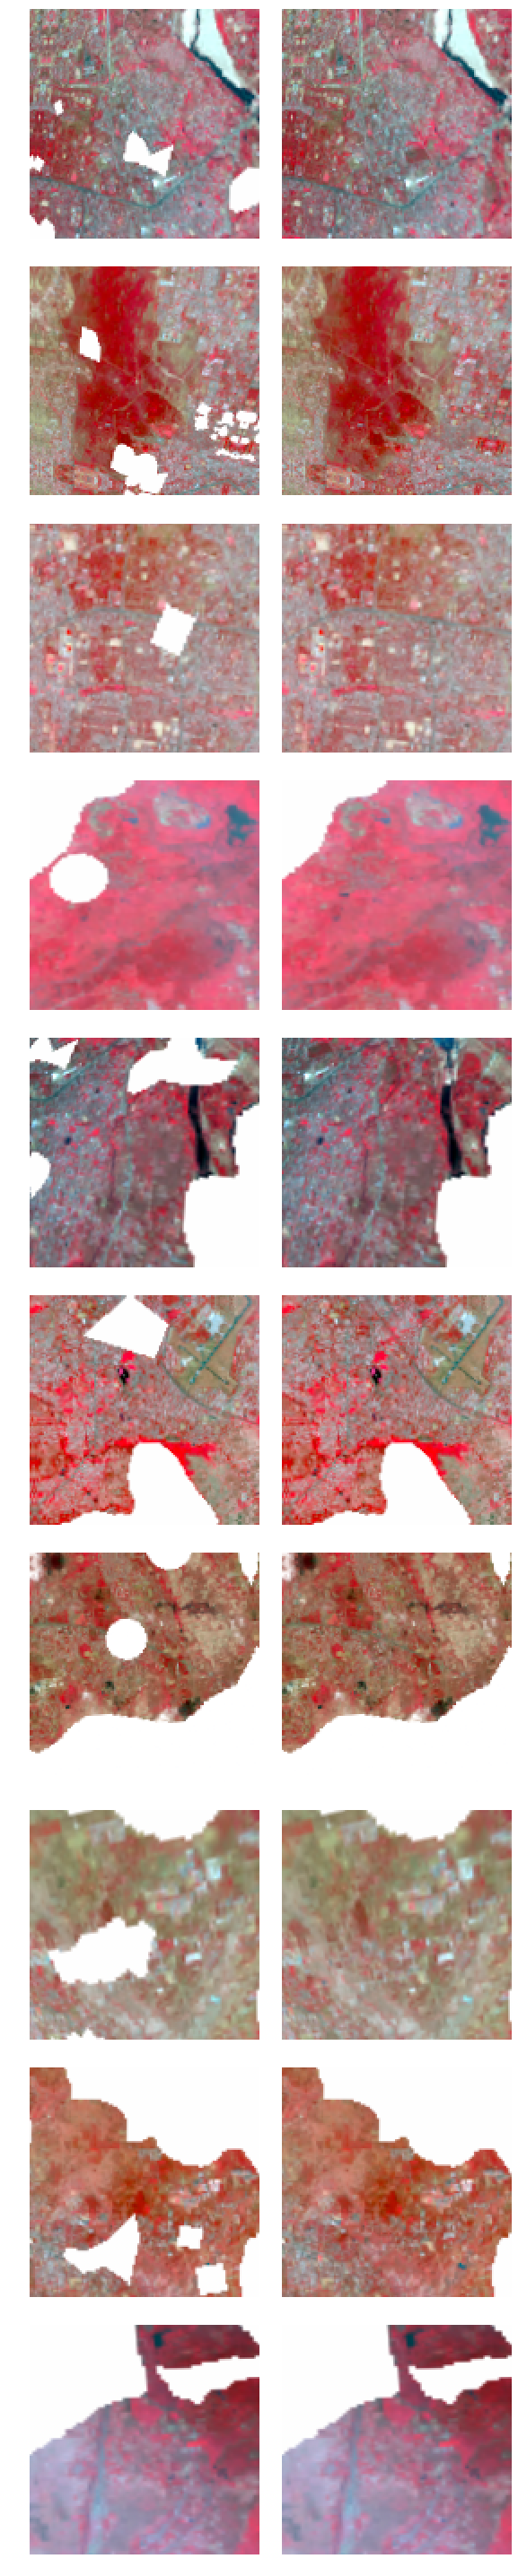

In [0]:
data_gen.show_batch(10)

In [0]:
wd = 1e-3

In [0]:
y_range = (-3.,3.)

In [0]:
loss_gen = MSELossFlat()

In [0]:
def create_gen_learner():
    return unet_learner(data_gen, arch, wd=wd, blur=True, norm_type=NormType.Weight,
                         self_attention=True, y_range=y_range, loss_func=loss_gen)

In [0]:
learn_gen = create_gen_learner()

In [0]:
learn_gen.fit_one_cycle(2, pct_start=0.8)

In [0]:
learn_gen.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


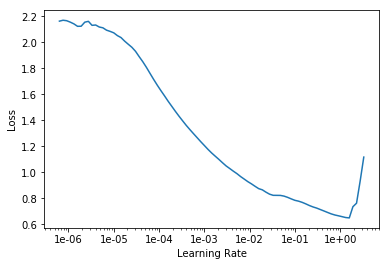

In [0]:
learn_gen.lr_find(end_lr=10)
learn_gen.recorder.plot()

In [0]:
## max_lr=slice(1e-4,1e-3)

In [0]:
learn_gen.fit_one_cycle(3, slice(1e-6,1e-3))

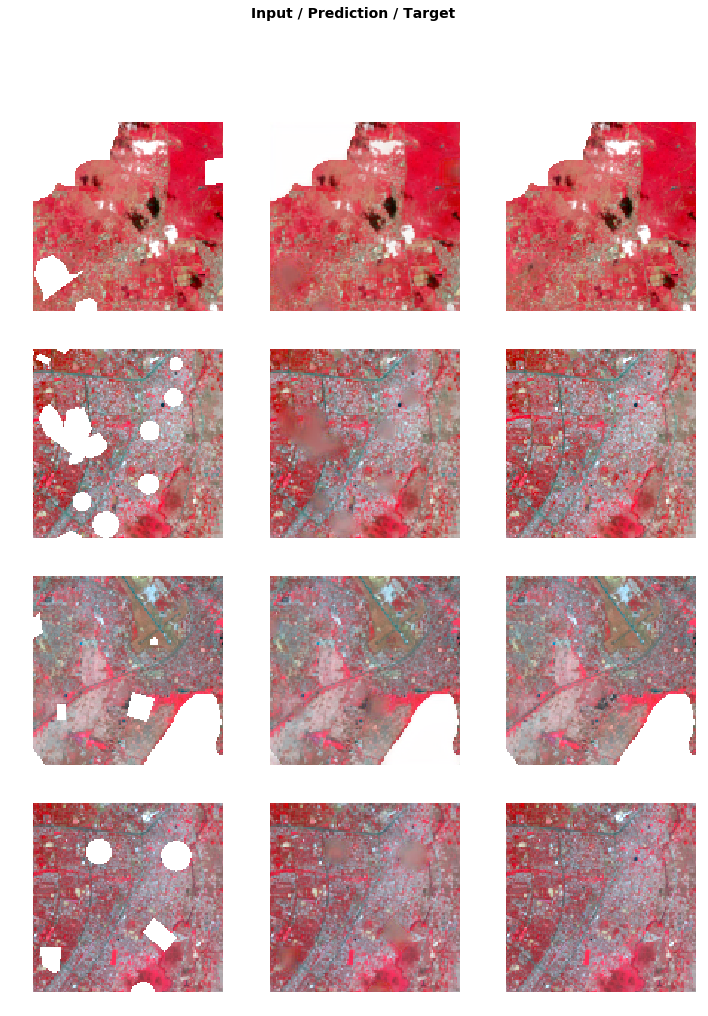

In [0]:
learn_gen.show_results(rows=4)

In [0]:
learn_gen.save('gen-pre2')

In [0]:
learn_gen.load('/content/gdrive/My Drive/Satellite/GAN/models/gen-pre2');

In [0]:
name_gen = 'image_gen'
path_gen = path+name_gen

In [0]:
path_gen

'/content/gdrive/My Drive/Satellite/GAN/image_gen'

In [0]:
#### Comment after first call


#shutil.rmtree(path_gen)

In [0]:
os.mkdir(path_gen)

In [0]:
def save_preds(dl):
    i=0
    names = dl.dataset.items
    
    for b in dl:
        preds = learn_gen.pred_batch(batch=b, reconstruct=True)
        for o in preds:
            o.save(path_gen+'/'+names[i].name)
            i += 1

In [0]:
save_preds(data_gen.fix_dl)

In [0]:
PIL.Image.open(path_gen.ls()[0])

In [0]:
learn_gen=None
gc.collect()

270

In [0]:
def get_crit_data(classes, bs, size):
    src = ImageList.from_folder(path, include=classes).split_by_rand_pct(0.1, seed=42)
    ll = src.label_from_folder(classes=classes)
    data = (ll.transform(get_transforms(max_zoom=2.), size=size)
           .databunch(bs=bs).normalize(imagenet_stats))
    data.c = 3
    return data

In [0]:
modified_data_critic = get_crit_data([name_gen, 'images_all', 'gen_op'], bs=bs, size=size)

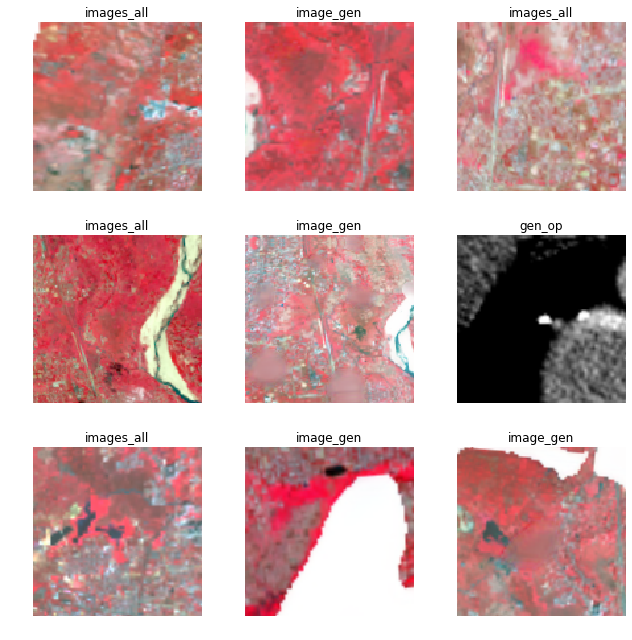

In [0]:
modified_data_critic.show_batch(rows=3, ds_type=DatasetType.Train, imgsize=3)

In [0]:
data_crit = get_crit_data([name_gen, 'images_all'], bs=bs, size=size)

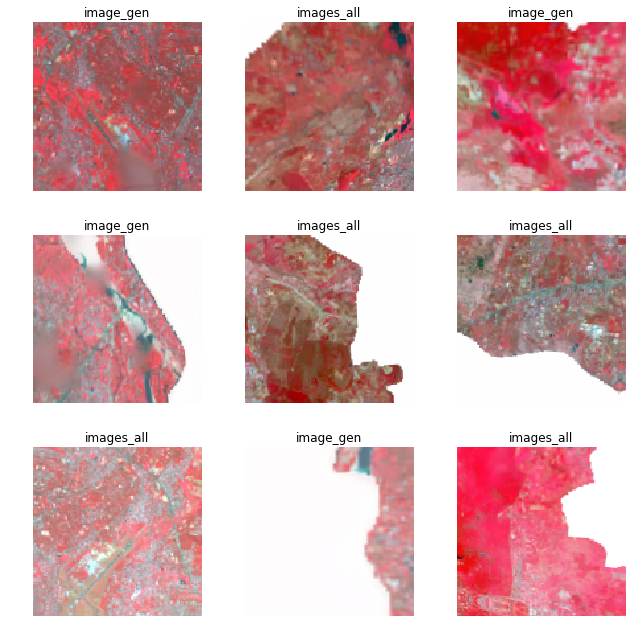

In [0]:
data_crit.show_batch(rows=3, ds_type=DatasetType.Train, imgsize=3)

In [0]:
loss_critic = AdaptiveLoss(nn.BCEWithLogitsLoss())

In [0]:
def create_critic_learner(data, metrics):
    return Learner(data, gan_critic(), metrics=metrics, loss_func=loss_critic, wd=wd)

In [0]:
## modified critic
learn_critic = create_critic_learner(modified_data_critic, accuracy_thresh_expand)

In [0]:
## Normal
learn_critic = create_critic_learner(data_crit, accuracy_thresh_expand)

In [0]:
learn_critic.fit_one_cycle(5, 1e-3)

In [0]:
learn_critic.save('/content/gdrive/My Drive/Satellite/GAN/models/critic-pre2')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


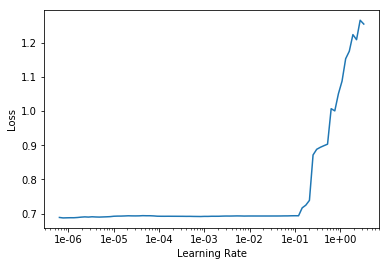

In [0]:
learn_critic.lr_find(end_lr=10)
learn_critic.recorder.plot()

In [0]:
learn_critic.fit_one_cycle(4, 1e-2)

In [0]:
learn_critic.save('/content/gdrive/My Drive/Satellite/GAN/models/critic-pre2_lr_1e_2')

In [0]:
##### Combining pre trained models

In [0]:
learn_crit=None
learn_gen=None
gc.collect()

7535

In [0]:
## crappy = clouds_all  images = images_all
data_crit = get_crit_data(['clouds_all', 'images_all'], bs=bs, size=size)

In [0]:
learn_crit = create_critic_learner(data_crit, metrics=None).load('/content/gdrive/My Drive/Satellite/GAN/models/critic-pre2')

In [0]:
learn_gen = create_gen_learner().load('/content/gdrive/My Drive/Satellite/GAN/models/gen-pre2')

In [0]:
switcher = partial(AdaptiveGANSwitcher, critic_thresh=0.65)
learn = GANLearner.from_learners(learn_gen, learn_crit, weights_gen=(1.,50.), show_img=False, switcher=switcher,
                                 opt_func=partial(optim.Adam, betas=(0.,0.99)), wd=wd)
learn.callback_fns.append(partial(GANDiscriminativeLR, mult_lr=5.))

NameError: ignored

In [0]:
lr = 1e-4

In [0]:
learn.fit(40,lr)

In [0]:
learn.save('/content/gdrive/My Drive/Satellite/GAN/models/gan-1c')

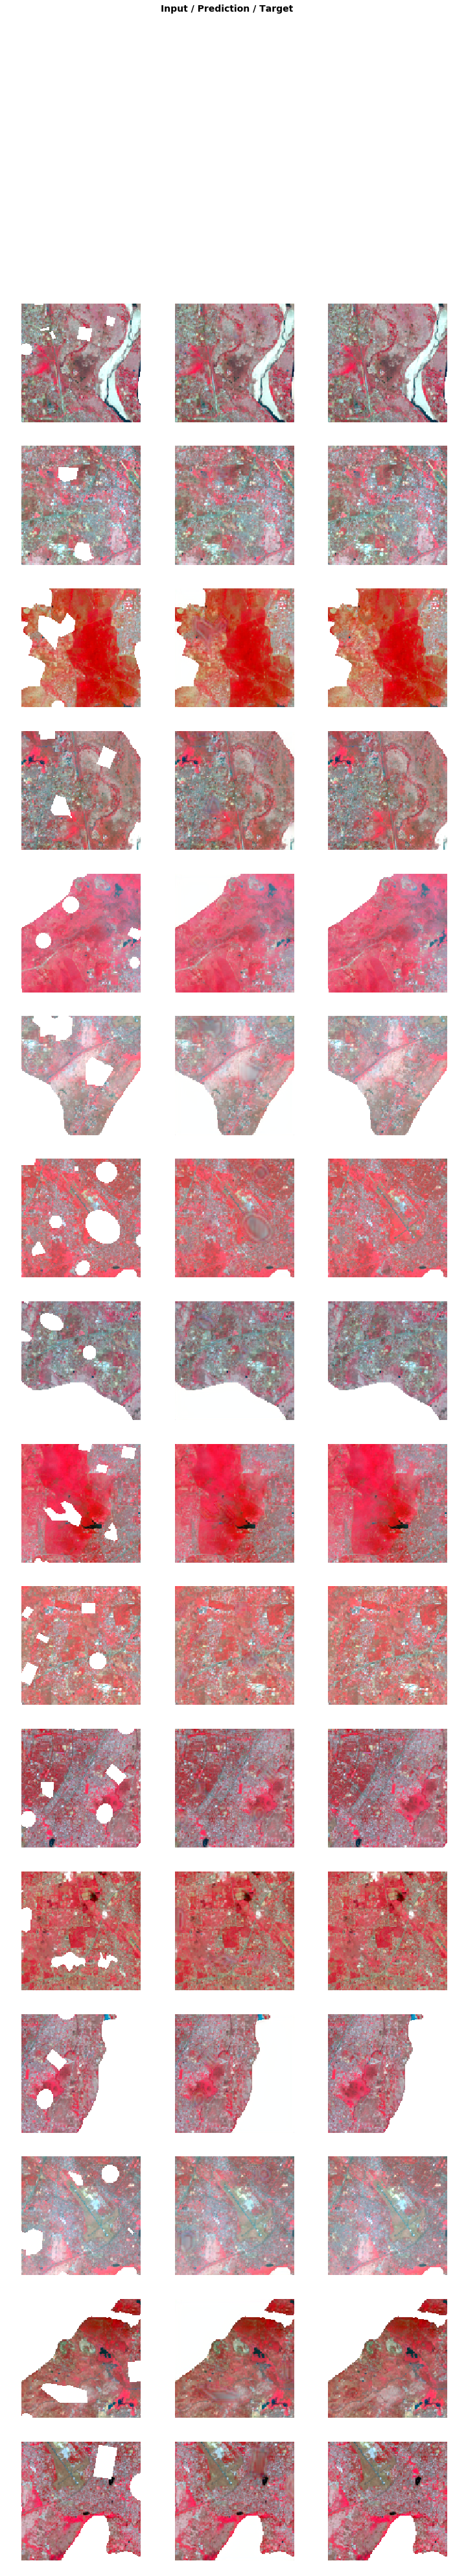

In [0]:
learn.show_results(rows=16)